In [17]:
import glob
import os
import cv2
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline
import numpy as np
import pandas as pd

In [18]:
tower_path = "tower_icons"

In [19]:
icons_named = glob.glob(tower_path+"/*.png")

In [20]:
icons_named

['tower_icons/almost_destroyed.png',
 'tower_icons/icon_image_103.png',
 'tower_icons/icon_image_102.png',
 'tower_icons/icon_image_100.png',
 'tower_icons/icon_image_101.png',
 'tower_icons/icon_image_105.png',
 'tower_icons/icon_image_104.png']

In [21]:
icon = cv2.cvtColor(cv2.imread("tower_icons/icon_image_102.png",1),cv2.COLOR_BGR2RGB)

In [22]:
almost_destroyed = cv2.imread("tower_icons/almost_destroyed.png",0)

In [23]:
def color_range_filter_with_params(img,min_hue,max_hue):
                      
    """Filter image by color(HSV).
    
    Args:
        img (np.ndarray): BGR image.
    
    Returns:
        np.ndarray: HSV filtered image.
    """                                      
    assert len(img.shape) > 2, 'Image should be in RGB format'
    img = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    
  
    image_mask= cv2.inRange(img,np.array(min_hue),np.array(max_hue))
    return image_mask

In [24]:
filtered_icon=color_range_filter_with_params(icon,(90,40,40),(110,250,250))

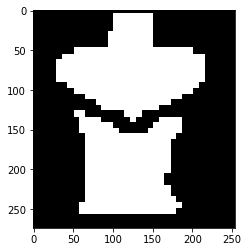

In [25]:
plt.imshow(filtered_icon,cmap="bone")

In [26]:
def shift_image(image,x_shift,y_shift):
    non = lambda s: s if s<0 else None
    mom = lambda s: max(0,s)
        
    shifted_image = np.zeros_like(image)
    shifted_image[mom(y_shift):non(y_shift), mom(x_shift):non(x_shift)] = \
    image[mom(-y_shift):non(-y_shift), mom(-x_shift):non(-x_shift)]
    return shifted_image

In [27]:
centered_icon = shift_image(filtered_icon,9,5)

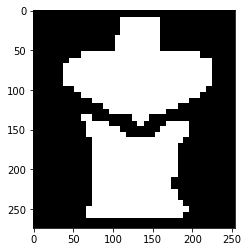

In [28]:
plt.imshow(centered_icon,cmap="bone")

In [29]:
centered_destroyed = shift_image(almost_destroyed,2,0)

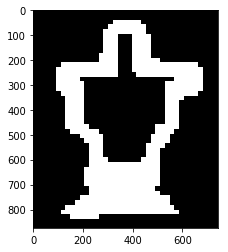

In [30]:
plt.imshow(centered_destroyed,cmap="bone")

## Try using  some edge detection

In [ ]:
map_edge = cv2.Laplacian(minimap,cv2.CV_32F)
icon_edge_old = cv2.Laplacian(small_icon,cv2.CV_32F)

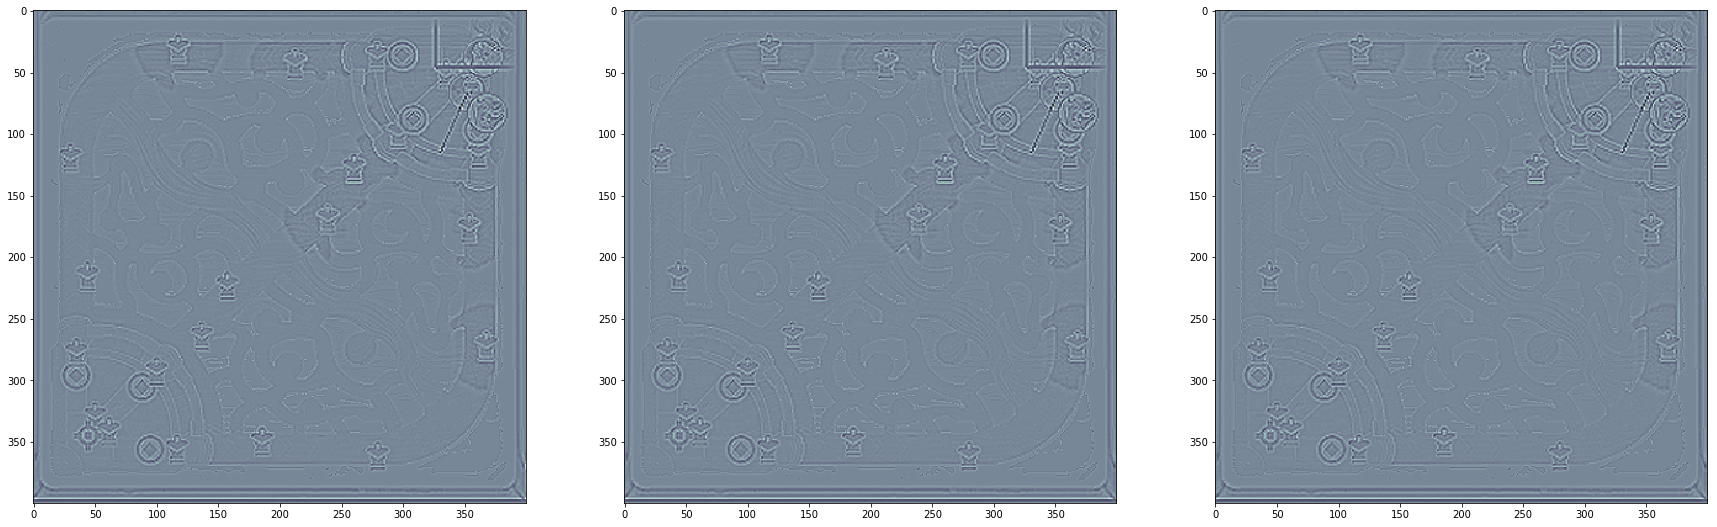

In [124]:
plt.subplots(figsize=(13,13))
plt.subplot(131)
plt.imshow(diff_edges[0],cmap="bone")
plt.subplot(132)
plt.imshow(diff_edges[1],cmap="bone")
plt.subplot(133)
plt.imshow(diff_edges[2],cmap="bone")

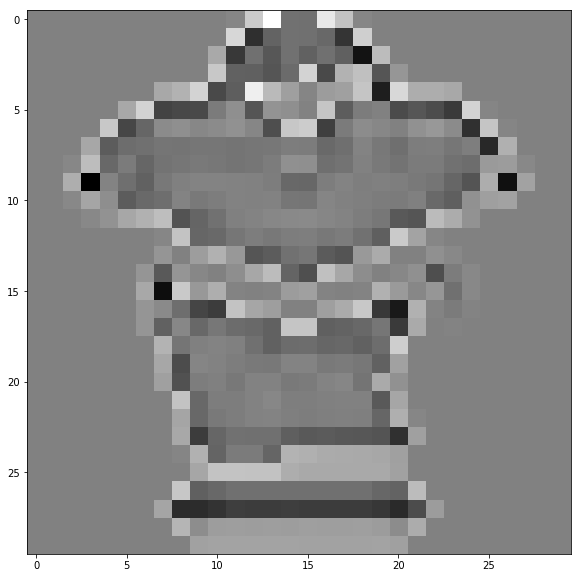

In [296]:
plt.subplots(figsize=(10,10))
plt.imshow(icon_edge)

In [1950]:
from itertools import product
combs = list(product(list(range(10,41)),list(range(10,41))))

In [1959]:
combs[353]

(21, 22)

In [1955]:
map_edge = cv2.Laplacian(cv2.resize(cv2.imread("minimap_with_destroyed.png",0),(400,400)),cv2.CV_32F)

In [1956]:
def calculate_res(dims):
    icon_edge = cv2.cvtColor(cv2.Laplacian(cv2.resize(centered_icon,dims,cv2.INTER_LANCZOS4),cv2.CV_32F),cv2.COLOR_BGR2GRAY)
    res = cv2.matchTemplate(map_edge,icon_edge,cv2.TM_CCOEFF_NORMED)
    return np.max(res)

In [1957]:
results = [calculate_res(dims) for dims in combs]

In [1958]:
np.argmax(results)

353

In [2125]:
map_edge = cv2.cvtColor(cv2.Laplacian(cv2.resize(cv2.imread("minimap_with_destroyed.png",1),(400,400)),cv2.CV_32F),cv2.COLOR_BGR2GRAY)
icon_edge = cv2.cvtColor(cv2.Laplacian(cv2.resize(centered_icon,(23, 24)),cv2.CV_32F),cv2.COLOR_BGR2GRAY)

w, h = icon_edge.shape[0],icon_edge.shape[1]

res = cv2.matchTemplate(map_edge,icon_edge,cv2.TM_CCOEFF_NORMED)
threshold = 0.28
loc = np.where(np.abs(res) >= threshold)

In [2126]:
np.max(res)

0.3823713

In [2127]:
for pt in zip(*loc[::-1]):
    cv2.rectangle(map_edge, pt, (pt[0] + w, pt[1] + h), (255,255,255), 1)

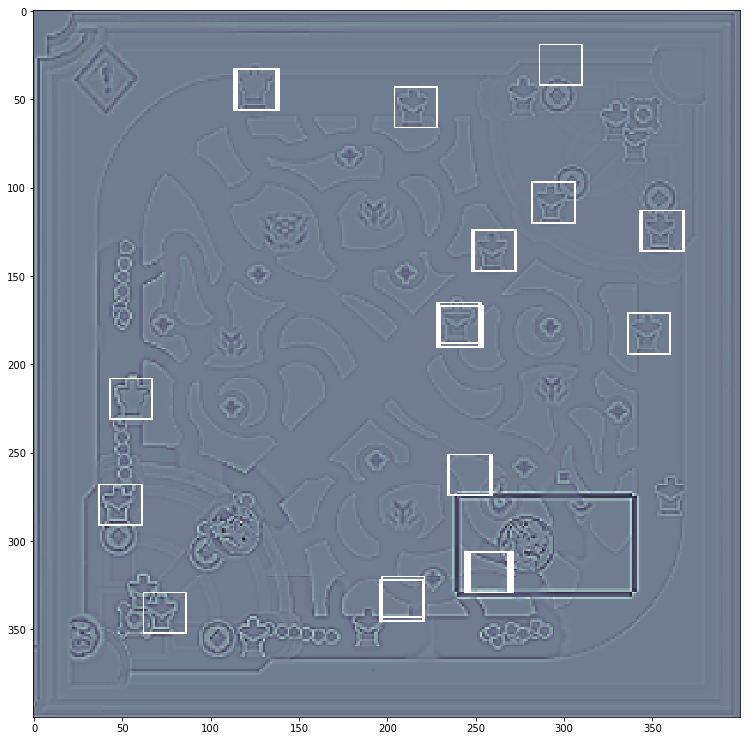

In [2128]:
plt.subplots(figsize=(13,13))
plt.imshow(map_edge,cmap="bone")

# How about Canny 

In [2005]:
map_not_resized = cv2.resize(cv2.GaussianBlur(cv2.imread("minimap_with_destroyed.png",1),(3,3),.1),(400,400))

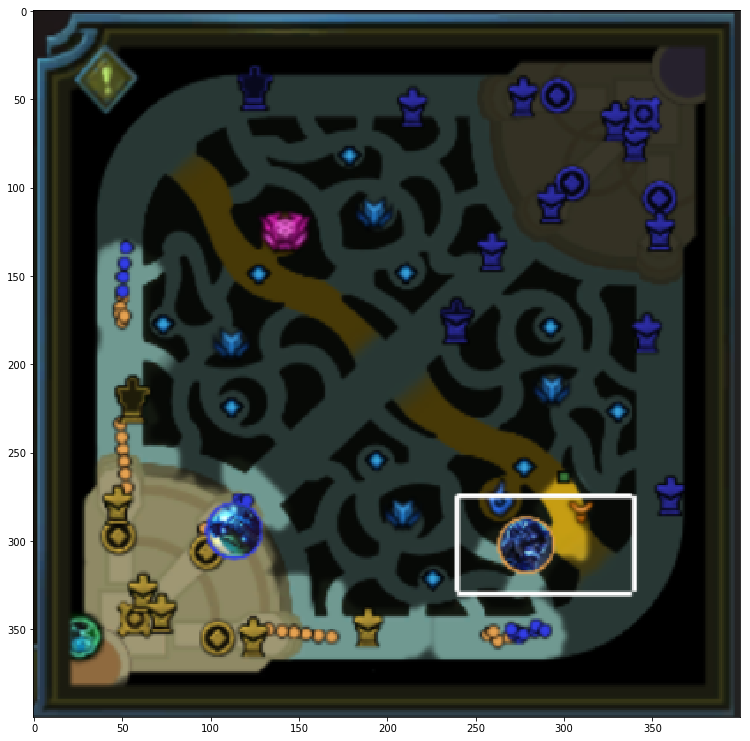

In [2006]:
plt.subplots(figsize=(13,13))
plt.imshow(map_not_resized)

In [1913]:
edges_crips = cv2.Canny(map_not_resized,50,150)

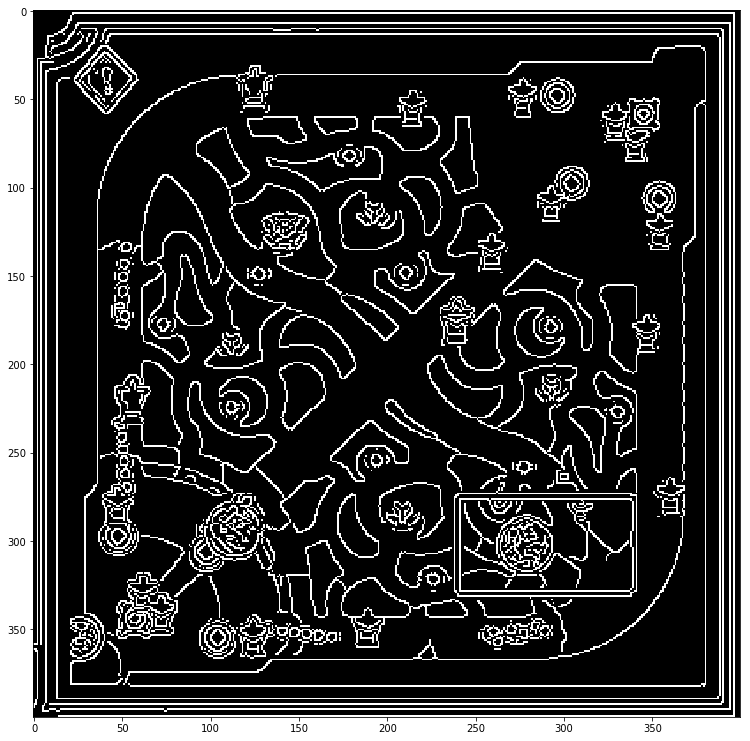

In [2009]:
plt.subplots(figsize=(13,13))
plt.imshow(edges_crips,cmap="bone")

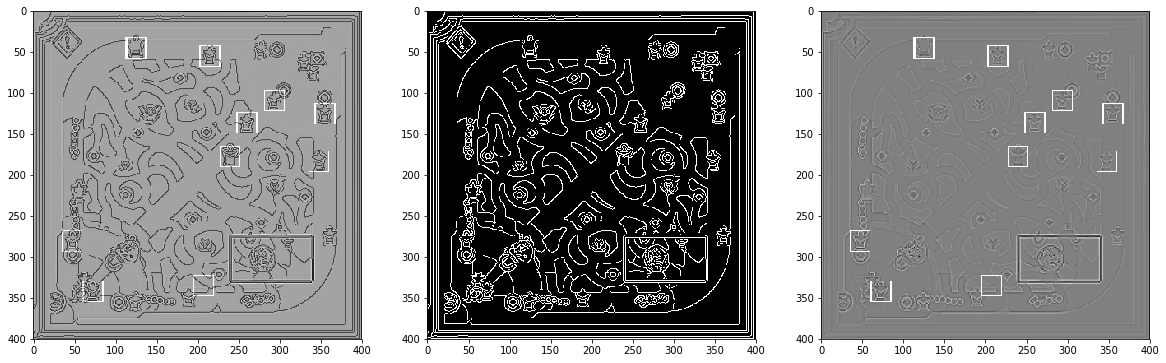

In [1822]:
plt.subplots(figsize=(20,20))
plt.subplot(131)
plt.imshow(map_edge - edges_crips)
plt.subplot(132)
plt.imshow(edges_crips)
plt.subplot(133)
plt.imshow(map_edge)

In [2010]:
icon_edge_canny  = cv2.Canny(small_icon,300,300)

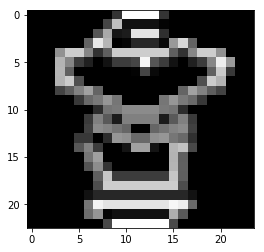

In [2129]:
plt.imshow(cv2.resize(icon_edge_canny,(24, 23),cv2.INTER_LANCZOS4))

In [2150]:
edges_crips = cv2.Canny(map_not_resized,300,300)
icon_edge_crisp = cv2.Canny(cv2.resize(centered_icon,(23, 24)),50,150)
w, h = icon_edge_crisp.shape[0],icon_edge_crisp.shape[1]

res = cv2.matchTemplate(edges_crips,icon_edge_crisp,cv2.TM_CCOEFF_NORMED)
threshold = 0.26
loc = np.where( np.abs(res) >= threshold)
np.max(res)

In [2152]:
for pt in zip(*loc[::-1]):
    cv2.rectangle(edges_crips, pt, (pt[0] + w, pt[1] + h), (220,20,60), 2)

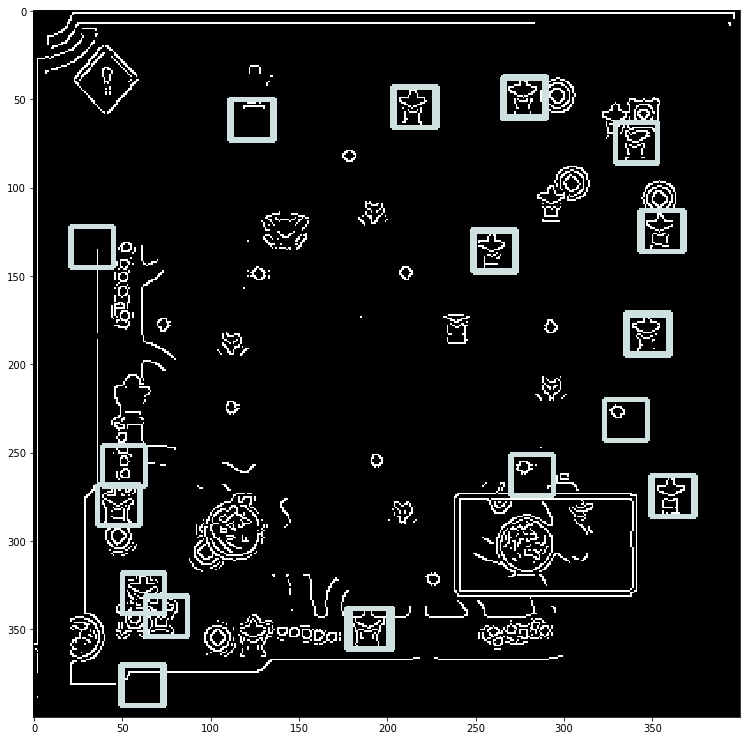

In [2153]:
plt.subplots(figsize=(13,13))
plt.imshow(edges_crips,cmap="bone")

# Pixel colour

In [32]:
minimap_colour = cv2.cvtColor(cv2.imread("minimap_with_destroyed.png",1),cv2.COLOR_BGR2RGB)

In [33]:
def color_range_filter(img):
                      
    """Filter image by color(HSV).
    
    Args:
        img (np.ndarray): BGR image.
    
    Returns:
        np.ndarray: HSV filtered image.
    """                                      
    assert len(img.shape) > 2, 'Image should be in RGB format'
    img = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    red_min_hsv,blue_min_hsv = ((0,0,50),(90,150,40))
    red_max_hsv,blue_max_hsv =((1,250,250),(100,200,200))
    
    image_mask_red = cv2.inRange(img, np.array(red_min_hsv), np.array(red_max_hsv))
    image_mask_blue = cv2.inRange(img,np.array(blue_min_hsv),np.array(blue_max_hsv))
    return image_mask_red+image_mask_blue

In [34]:
'''
red_min_hsv,blue_min_hsv = ((0,0,50),(90,150,50))
red_max_hsv,blue_max_hsv =((1,250,250),(100,200,200))
'''

'\nred_min_hsv,blue_min_hsv = ((0,0,50),(90,150,50))\nred_max_hsv,blue_max_hsv =((1,250,250),(100,200,200))\n'

In [35]:
filtered = color_range_filter(minimap_colour)

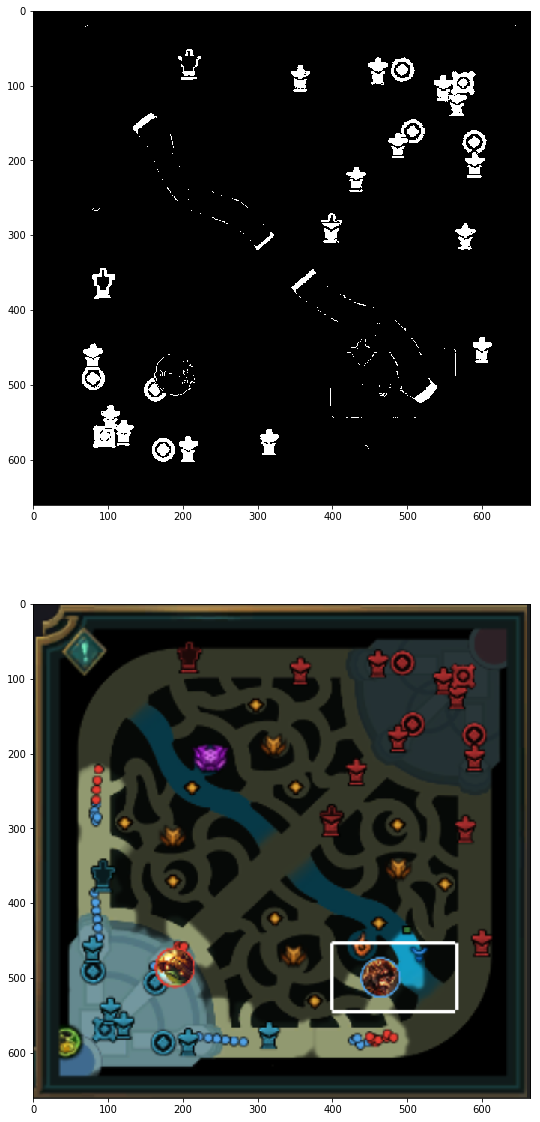

In [36]:
plt.subplots(figsize=(20,20))
plt.subplot(211)
plt.imshow(filtered,cmap="bone")
plt.subplot(212)
plt.imshow(minimap_colour,cmap="bone")

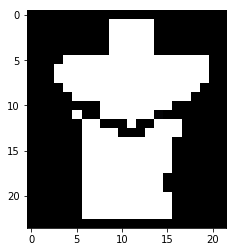

In [37]:
small_icon= shift_image(cv2.resize(centered_icon,(22,24),cv2.INTER_CUBIC),0,0)
small_icon[small_icon>20]=255
plt.imshow(small_icon,cmap="bone")

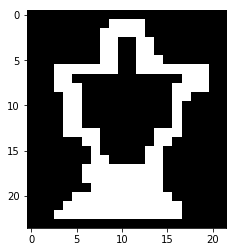

In [38]:
small_destroyed= shift_image(cv2.resize(almost_destroyed,(22,24),cv2.INTER_CUBIC),0,0)
small_destroyed[small_destroyed>20]=255
plt.imshow(small_destroyed,cmap="bone")

In [39]:
filtered = cv2.resize(color_range_filter(minimap_colour),(400,400))
w, h = small_icon.shape[0],small_icon.shape[1]
res = cv2.matchTemplate(filtered,small_icon,cv2.TM_CCOEFF_NORMED)
threshold = 0.45
loc = np.where( np.abs(res) >= threshold)
probs = np.abs(res[np.abs(res) >= threshold])
np.max(res)

0.88781005

In [40]:
for pt in zip(*loc[::-1]):
    cv2.rectangle(filtered, pt, (pt[0] + h, pt[1] + w), (100,200,200), 1)

In [41]:
boxes = [(pt , (pt[0] + h, pt[1] + w)) for pt in zip(*loc[::-1])]

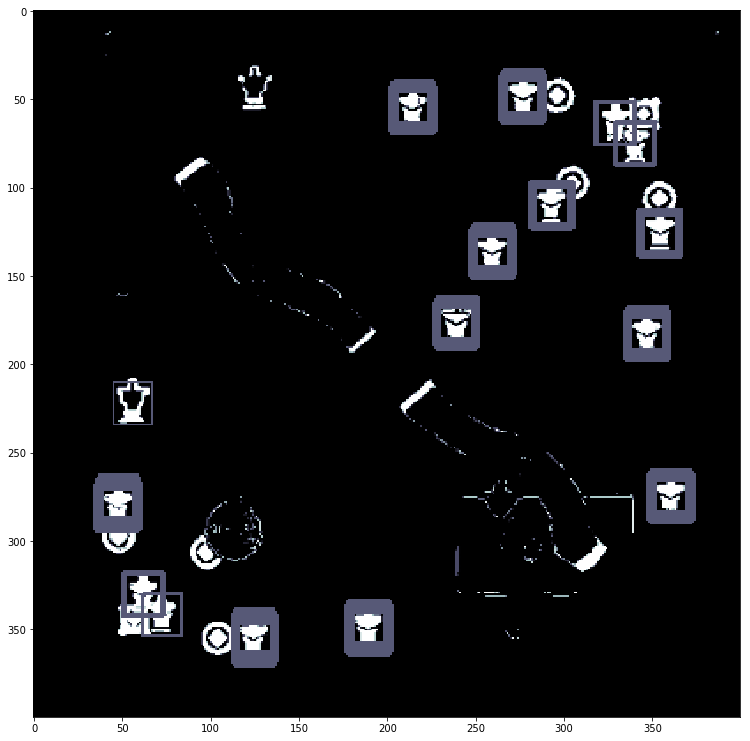

In [42]:
plt.subplots(figsize=(13,13))
plt.imshow(filtered,cmap="bone")

In [43]:
def plot_sections(minimap,ratio=0.7875):
    minimap_cp = minimap.copy()
    line_coords_base  = (int(minimap.shape[0]*ratio),int(minimap.shape[0]-minimap.shape[0]*ratio))
    line_coords = [((line_coords_base[0],0),(line_coords_base[0],minimap.shape[0])),\
                   ((line_coords_base[1],0),(line_coords_base[1],minimap.shape[0])),\
                   ((0,line_coords_base[0]),(minimap.shape[0],line_coords_base[0])),\
                   ((0,line_coords_base[1]),(minimap.shape[0],line_coords_base[1])),\
                   ((0,0),(minimap.shape[0],minimap.shape[0]))]
    
    
    for line_coord_pair in line_coords:
        minimap_cp = cv2.line(minimap_cp,*line_coord_pair,(255,0,0),1) 
        
    return minimap_cp,line_coords   

In [44]:
import numpy as np  
def non_max_suppression_fast(boxes,probabilities,overlapThresh):
    # if there are no boxes, return an empty list
    if len(boxes) == 0:
        return []
    # if the bounding boxes integers, convert them to floats --
    # this is important since we'll be doing a bunch of divisions
    if boxes.dtype.kind == "i":
        boxes = boxes.astype("float")

    # initialize the list of picked indexes	
    pick = []

    # grab the coordinates of the bounding boxes
    x1 = boxes[:,0]
    y1 = boxes[:,1]
    x2 = boxes[:,2]
    y2 = boxes[:,3]
    

    # compute the area of the bounding boxes and sort the bounding
    # boxes by the bottom-right y-coordinate of the bounding box
    area = (x2 - x1 + 1) * (y2 - y1 + 1)
    idxs = np.argsort(probabilities)
    

    # keep looping while some indexes still remain in the indexes
    # list
    while len(idxs) > 0:
        # grab the last index in the indexes list and add the
        # index value to the list of picked indexes
        last = len(idxs) - 1
        i = idxs[last]
        pick.append(i)

        # find the largest (x, y) coordinates for the start of
        # the bounding box and the smallest (x, y) coordinates
        # for the end of the bounding box
        xx1 = np.maximum(x1[i], x1[idxs[:last]])
        yy1 = np.maximum(y1[i], y1[idxs[:last]])
        xx2 = np.minimum(x2[i], x2[idxs[:last]])
        yy2 = np.minimum(y2[i], y2[idxs[:last]])

        # compute the width and height of the bounding box
        w = np.maximum(0, xx2 - xx1 + 1)
        h = np.maximum(0, yy2 - yy1 + 1)

        # compute the ratio of overlap
        overlap = (w * h) / area[idxs[:last]]

        # delete all indexes from the index list that have
        idxs = np.delete(idxs, np.concatenate(([last],
            np.where(overlap > overlapThresh)[0])))

    # return only the bounding boxes that were picked using the
    # integer data type
    return probs[pick],boxes[pick].astype("int")
    

In [45]:
np_boxes = np.array(boxes).reshape(-1,4)

In [46]:
len(np_boxes)

356

In [47]:
probs,new_boxes = non_max_suppression_fast(np_boxes,probs,.4)
filtered = cv2.resize(color_range_filter(minimap_colour),(400,400))

In [48]:
for pt in new_boxes:
    cv2.rectangle(filtered, (pt[0] , pt[1]), (pt[2] , pt[3]), (255,0,0), 1)

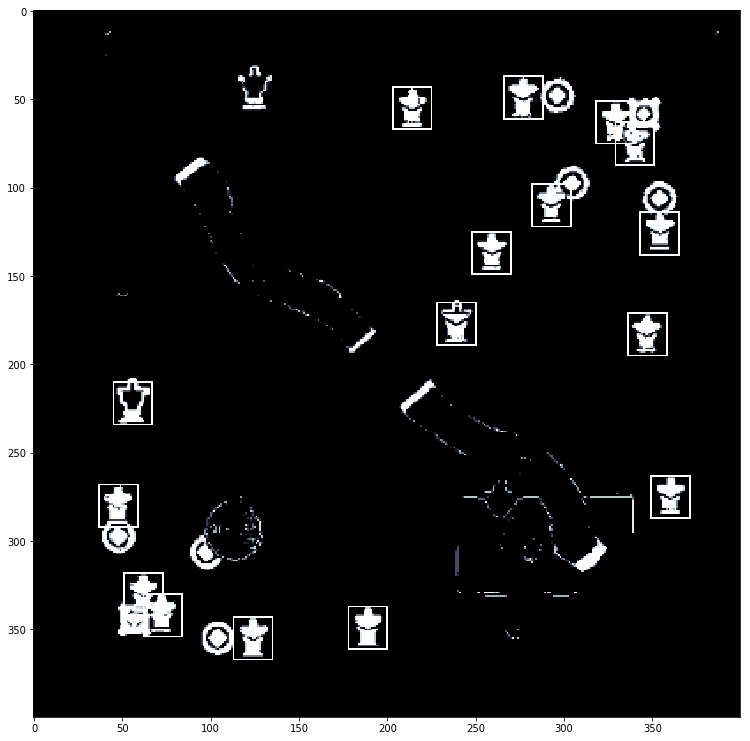

In [49]:
plt.subplots(figsize=(13,13))
plt.imshow(filtered,cmap="bone")

In [50]:
def calculate_line_vector(line_tuple):
    return (line_tuple[1][0] - line_tuple[0][0],line_tuple[1][1]-line_tuple[0][1])

In [92]:
def check_along_line_position(tower_locs,line_coords = ((0,0),(400,400))):
    
    """ 
    
    NOTE HERE :
        
        For vertical lines -  is greater logic should be applied
        For horizontal - is less
        
    """
    
    
    line_vector = calculate_line_vector(line_coords)
    boxes_vectors = np.hstack( ((np.mean(tower_locs[:,:4:2],axis=1) - line_coords[0][0]).reshape(-1,1),\
                          (np.mean(tower_locs[:,1:4:2],axis=1) - line_coords[0][1]).reshape(-1,1)))
    #v2 = {xA-x1, yA-y1}

    return (np.cross(np.array(line_vector),boxes_vectors)<0).reshape(-1,1)

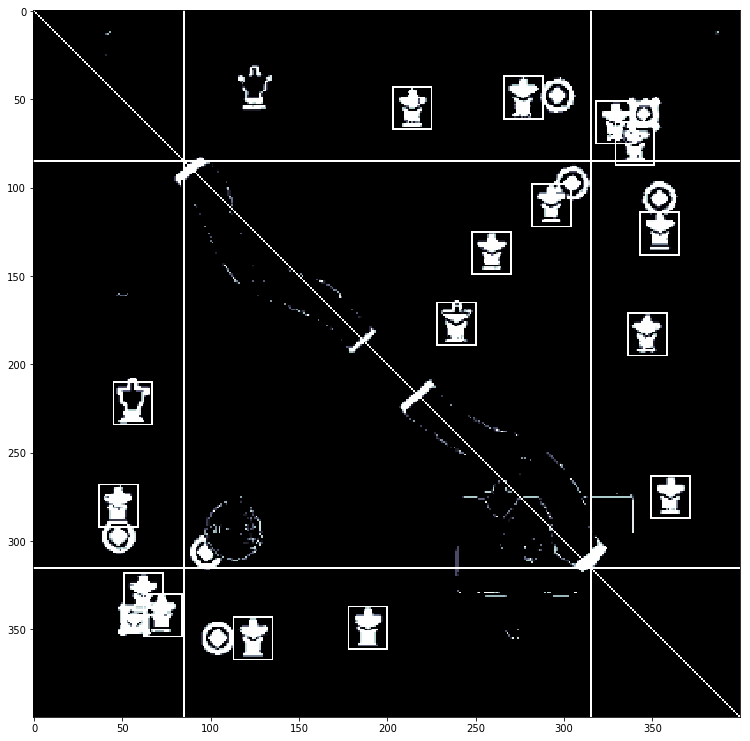

In [93]:
plt.subplots(figsize=(13,13))
with_sections, line_equations = plot_sections(filtered)
plt.imshow(with_sections,cmap="bone")

In [94]:
line_vectors = [calculate_line_vector(coords) for coords in line_equations]

In [95]:
line_equations,line_vectors

([((315, 0), (315, 400)),
  ((85, 0), (85, 400)),
  ((0, 315), (400, 315)),
  ((0, 85), (400, 85)),
  ((0, 0), (400, 400))],
 [(0, 400), (0, 400), (400, 0), (400, 0), (400, 400)])

In [96]:
line_mapper = dict(zip(line_equations,["RIGHT","LEFT","BOTTOM","TOP","MIDDLE"]))

In [97]:
boxes_df = pd.DataFrame(new_boxes,columns=["x1","y1","x2","y2"])

In [98]:
for equation in line_equations:
    boxes_df[line_mapper.get(equation,"UNKNOWN")]=check_along_line_position(new_boxes,equation)
boxes_df["almost_destroyed"] =False    

In [104]:
boxes_df["Player_below_base"] = (~boxes_df["BOTTOM"] & ~boxes_df["LEFT"])
boxes_df["Player_above_base"] = (boxes_df["TOP"] & boxes_df["RIGHT"])

boxes_df["Player_below_top"] = (boxes_df["BOTTOM"] & ~boxes_df["LEFT"] & ~boxes_df["TOP"])
boxes_df["Player_above_top"] = (boxes_df["TOP"] & boxes_df["LEFT"] & ~boxes_df["RIGHT"])

boxes_df["Player_below_bottom"] = (~boxes_df["BOTTOM"] & ~boxes_df["RIGHT"] & boxes_df["LEFT"])
boxes_df["Player_above_bottom"] = (boxes_df["BOTTOM"] & boxes_df["RIGHT"] & ~boxes_df["TOP"])

boxes_df["Player_below_mid"] = (boxes_df["BOTTOM"] & boxes_df["LEFT"] & ~boxes_df["MIDDLE"])
boxes_df["Player_above_mid"] = (~boxes_df["TOP"] & ~boxes_df["RIGHT"] & boxes_df["MIDDLE"])

In [111]:
boxes_df[boxes_df["Player_above_bottom"]]

,x1,y1,x2,y2,RIGHT,LEFT,BOTTOM,TOP,MIDDLE,almost_destroyed,Player_below_base,Player_above_base,Player_below_top,Player_above_top,Player_below_bottom,Player_above_bottom,Player_below_mid,Player_above_mid
3,349,263,371,287,True,True,True,False,True,False,False,False,False,False,False,True,False,False
4,336,171,358,195,True,True,True,False,True,False,False,False,False,False,False,True,False,False
8,343,114,365,138,True,True,True,False,True,False,False,False,False,False,False,True,False,False


In [58]:
def vrange(starts, stops):
    """Create concatenated ranges of integers for multiple start/stop

    Parameters:
        starts (1-D array_like): starts for each range
        stops (1-D array_like): stops for each range (same shape as starts)

    Returns:
        numpy.ndarray: concatenated ranges

    For example:

        >>> starts = [1, 3, 4, 6]
        >>> stops  = [1, 5, 7, 6]
        >>> vrange(starts, stops)
        array([3, 4, 4, 5, 6])

    """
    stops = np.asarray(stops)
    l = (stops - starts)-1 # Lengths of each range.
    return (np.repeat(stops - l.cumsum(), l) + np.arange(l.sum())).reshape(-1,l[0])

In [59]:
new_boxes

array([[266,  37, 288,  61],
       [113, 343, 135, 367],
       [178, 337, 200, 361],
       [349, 263, 371, 287],
       [336, 171, 358, 195],
       [ 37, 268,  59, 292],
       [203,  43, 225,  67],
       [248, 125, 270, 149],
       [343, 114, 365, 138],
       [228, 165, 250, 189],
       [282,  98, 304, 122],
       [ 51, 318,  73, 342],
       [329,  63, 351,  87],
       [318,  51, 340,  75],
       [ 62, 330,  84, 354],
       [ 45, 210,  67, 234]])

In [61]:
rows_indecies,cols_indecies= vrange(new_boxes[:,1],new_boxes[:,3]),vrange(new_boxes[:,0],new_boxes[:,2]),

In [62]:
images = [(filtered[index[0]][:,index[1]]) for index in zip(rows_indecies,cols_indecies)]

0.88781005


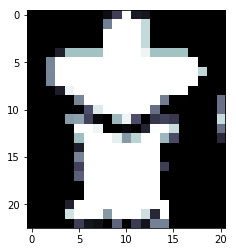

0.87909293


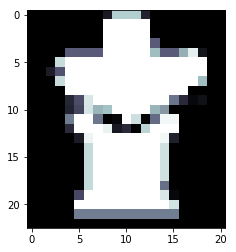

0.8553125


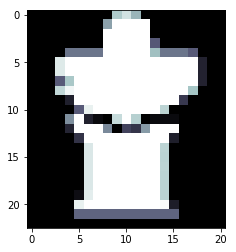

0.8414277


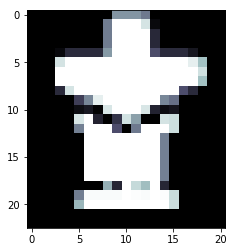

0.8388052


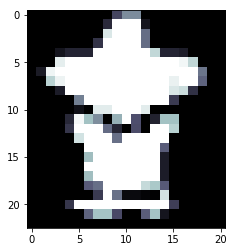

0.8243034


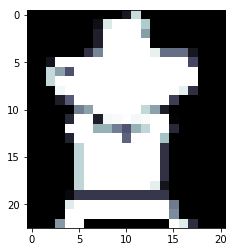

0.82378054


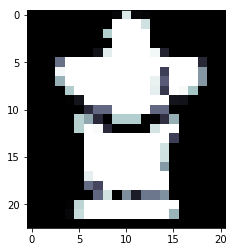

0.820845


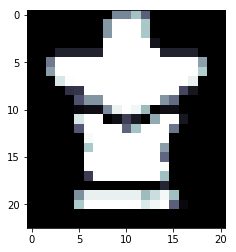

0.7764707


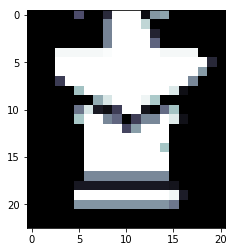

0.75504494


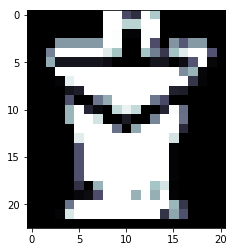

0.7027906


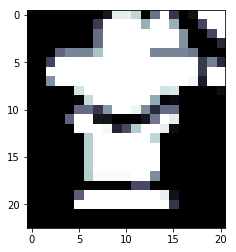

0.5694456


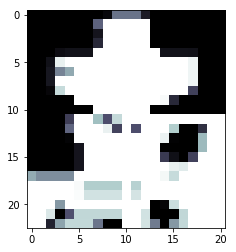

0.5620187


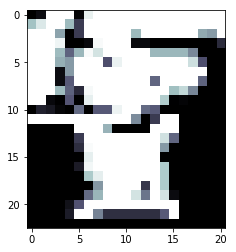

0.5436716


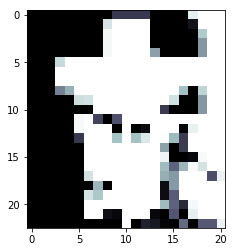

0.4914052


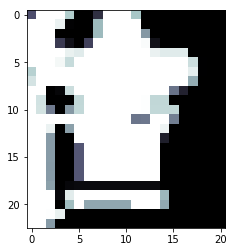

0.45195934


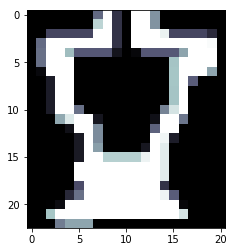

In [63]:
for image,prob in zip(images,probs):
    plt.imshow(image,cmap="bone")
    print(prob)
    plt.show()

In [72]:
images_copy = images.copy()

In [91]:
images_copy[0]=np.zeros(images[0].shape,dtype=np.uint8)
images_copy[2]=np.zeros(images[2].shape,dtype=np.uint8)

In [64]:
for image in images:
    print(np.mean(cv2.matchTemplate(small_icon,image,cv2.TM_CCOEFF_NORMED)))

0.79669064
0.81714153
0.80693114
0.77418995
0.7590794
0.74034077
0.7984884
0.7341586
0.6915505
0.64441526
0.62141675
0.48748314
0.49300998
0.5090173
0.40122062
0.3644664


In [65]:
for image in images:
    print(np.mean(cv2.matchTemplate(small_destroyed,image,cv2.TM_CCOEFF_NORMED)))

0.44333023
0.43027064
0.41949612
0.3594078
0.371859
0.4148183
0.42698723
0.31447765
0.25118518
0.37446946
0.25886905
0.23321459
0.21446458
0.19502074
0.10597047
0.55105436


In [123]:
images_dict = dict(enumerate(image))

In [176]:
def update_tower_status(almost_destroyed_threshold=0.05):
    tower_scores = np.array([np.mean(cv2.matchTemplate(image,small_icon,cv2.TM_CCORR_NORMED)) for image in images_copy])
    destructed_scores = np.array([np.mean(cv2.matchTemplate(image,small_destroyed,cv2.TM_CCORR_NORMED)) for image in images_copy])
    res = destructed_scores-tower_scores
    completety_destroyed = np.argwhere(res==0)
    almost_destroyed = np.argwhere(res>almost_destroyed_threshold)
    return almost_destroyed,completety_destroyed.reshape(len(completety_destroyed))


In [177]:
def update_df_and_image_dict(almost_destroyed,completely_destroyed):
    if len(almost_destroyed!=0): boxes_df.loc[almost_destroyed,"almost_destroyed"] = True
    if len(completely_destroyed!=0): 
        boxes_df.drop(completely_destroyed,inplace=True)
        _ = [images_dict.pop(key) for key in completely_destroyed]

In [178]:
update_df_and_image_dict(*update_tower_status())

In [179]:
boxes_df

,x1,y1,x2,y2,RIGHT,LEFT,BOTTOM,TOP,MIDDLE,Player_below_base,Player_above_base,Player_below_top,Player_above_top,Player_below_bottom,Player_above_bottom,Player_below_mid,Player_above_mid,almost_destroyed
1,113,343,135,367,False,True,False,False,False,False,False,False,False,True,False,False,False,False
3,349,263,371,287,True,True,True,False,True,False,False,False,False,False,True,False,False,False
4,336,171,358,195,True,True,True,False,True,False,False,False,False,False,True,False,False,False
5,37,268,59,292,False,False,True,False,False,False,False,True,False,False,False,False,False,False
6,203,43,225,67,False,True,True,True,True,False,False,False,True,False,False,False,True,False
7,248,125,270,149,False,True,True,False,True,False,False,False,False,False,False,False,False,False
8,343,114,365,138,True,True,True,False,True,False,False,False,False,False,True,False,False,False
9,228,165,250,189,False,True,True,False,True,False,False,False,False,False,False,False,False,False
10,282,98,304,122,False,True,True,False,True,False,False,False,False,False,False,False,False,False
11,51,318,73,342,False,False,False,False,False,True,False,False,False,False,False,False,False,False
